<a href="https://colab.research.google.com/github/prathvin123/Emotion_Detction/blob/main/Emotion_recognization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?d1=0
!unzip train.zip?d1=0

--2022-09-18 06:35:25--  https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?d1=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/w3zlhing4dkgeyb/train.zip [following]
--2022-09-18 06:35:26--  https://www.dropbox.com/s/raw/w3zlhing4dkgeyb/train.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2d2fe53e84896af046d121ba95.dl.dropboxusercontent.com/cd/0/inline/BtLW3iPIdcvmqUWzjWdR4U4lbkS8HPqkbeA5G_9TYXM7adPt2GQcyDnD6o0sQ8emZBkP7bQErHhcDphQe04YBI8MnjBC2Sh6x4-BsdpnfSkbHON7XZL0H2KAoEgqc6llx4x8EG37pDVdMgKIKg8RJExE3QDOePr3sn_PhI-Zlry9ug/file# [following]
--2022-09-18 06:35:26--  https://uc2d2fe53e84896af046d121ba95.dl.dropboxusercontent.com/cd/0/inline/BtLW3iPIdcvmqUWzjWdR4U4lbkS8HPqkbeA5G_9TYXM7adPt2GQcyDnD6o0sQ8emZBkP7bQErHhcDphQe04Y

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.applications.mobilenet import MobileNet,preprocess_input
from keras.models import Model
from keras.layers import Flatten, Dense

from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img

In [4]:
base_model=MobileNet(input_shape=(224,224,3),include_top=False)
for layer in base_model.layers:
 layer.trainable=False

X= Flatten()(base_model.output)
X=Dense(units=7,activation='softmax')(X)

Model=Model(base_model.input,X)

17235968/17225924 [==============================] - 0s 0us/step


In [5]:
Model.summary

<bound method Model.summary of <keras.engine.functional.Functional object at 0x7fd06f3c3390>>

In [6]:
Model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])


In [7]:
train_datagen=ImageDataGenerator(
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    rescale=1./255
)
train_data=train_datagen.flow_from_directory(directory="/content/train",
target_size=(224,224),
batch_size=32,
)
train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [8]:
val_datagen=ImageDataGenerator(rescale=1/255)
val_data=val_datagen.flow_from_directory(directory="/content/train",
                                         target_size=(224,224),
                                         batch_size=32,
                                         )

Found 350 images belonging to 7 classes.


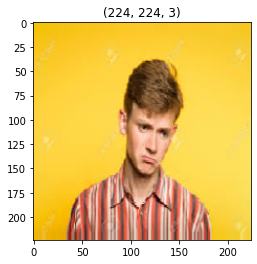

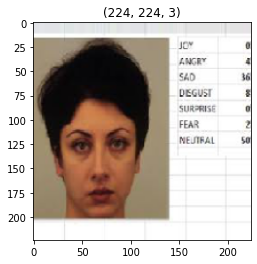

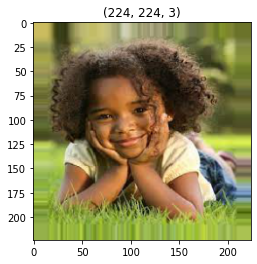

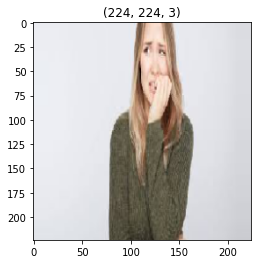

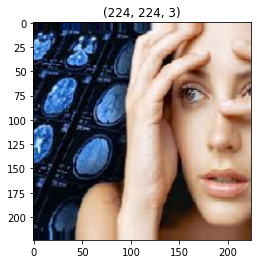

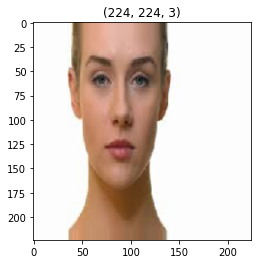

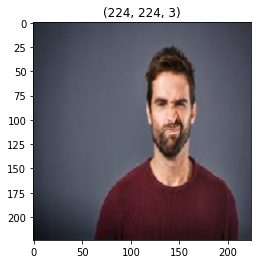

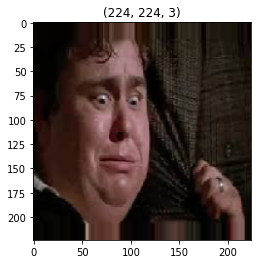

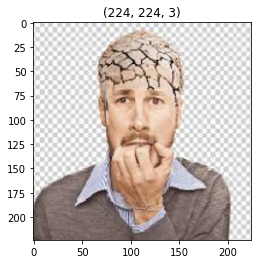

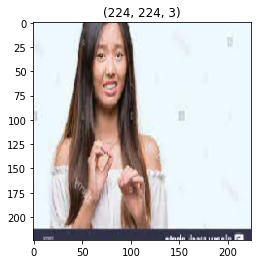

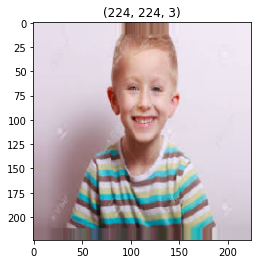

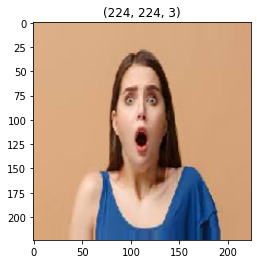

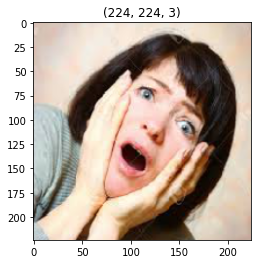

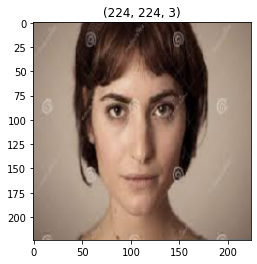

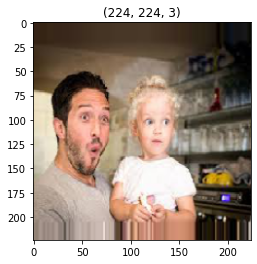

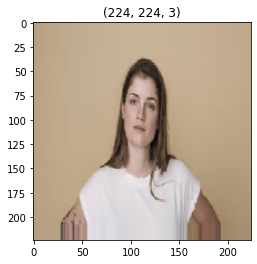

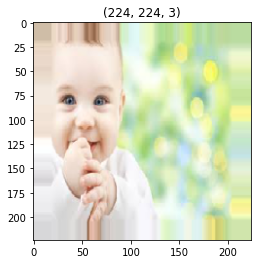

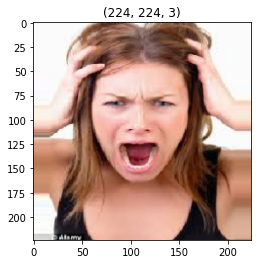

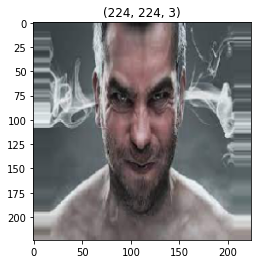

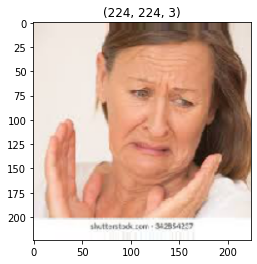

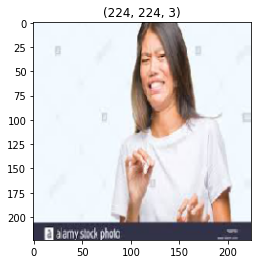

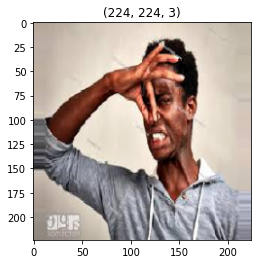

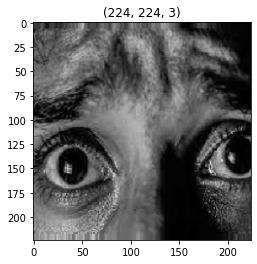

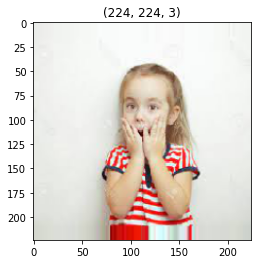

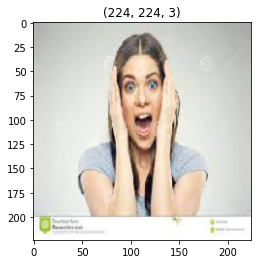

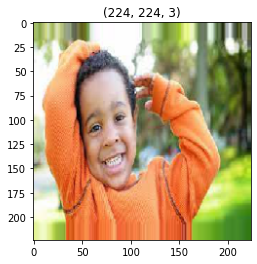

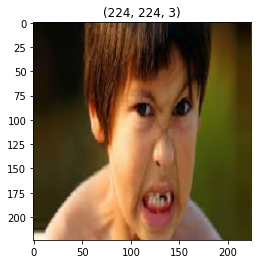

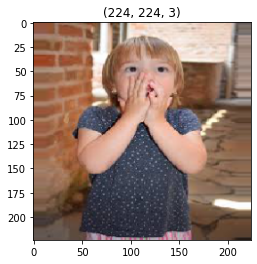

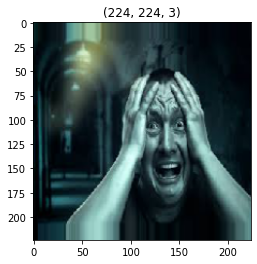

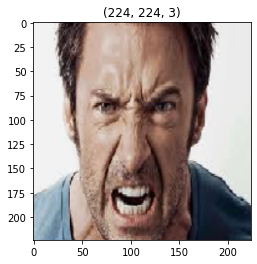

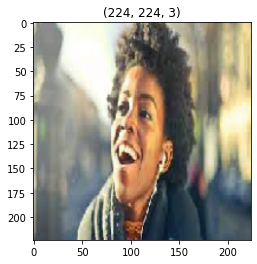

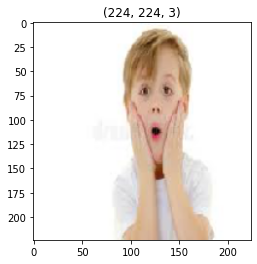

In [14]:
t_img,label=train_data.next()

def plotImages(img_arr,label):
    """
    input:-images array
    output:-plot the images
    """
    Count = 0
    for im, l in zip(img_arr,label) : 
      plt.imshow(im)
      plt.title(im.shape)
      plt.axis=False
      plt.show()

      Count += 1
      if count==10:
        break
plotImages(t_img,label)

In [15]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

es=EarlyStopping(monitor='val_accurcy',min_delta=0.01,patience=5,verbose=1,mode='auto')

mc=ModelCheckpoint(filepath="best_model.h5",monitor='val_accuracy',verbose=1,save_best_only=True,mode='auto')
call_back=[es,mc]

In [17]:
hist=Model.fit_generator(train_data,
                         steps_per_epoch=10,
                         epochs=30,
                         validation_data=val_data,
                         validation_steps=8,
                         callbacks=[es,mc])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 12.5055 - accuracy: 0.2767


Epoch 1: val_accuracy improved from -inf to 0.45703, saving model to best_model.h5
10/10 [==============================] - 25s 2s/step - loss: 12.5055 - accuracy: 0.2767 - val_loss: 6.4609 - val_accuracy: 0.4570
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 5.0871 - accuracy: 0.5252


Epoch 2: val_accuracy improved from 0.45703 to 0.68359, saving model to best_model.h5
10/10 [==============================] - 23s 2s/step - loss: 5.0871 - accuracy: 0.5252 - val_loss: 2.4648 - val_accuracy: 0.6836
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 2.3255 - accuracy: 0.7358


Epoch 3: val_accuracy improved from 0.68359 to 0.91406, saving model to best_model.h5
10/10 [==============================] - 29s 3s/step - loss: 2.3255 - accuracy: 0.7358 - val_loss: 0.4610 - val_accuracy: 0.9141
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.5603 - accuracy: 0.8616


Epoch 4: val_accuracy improved from 0.91406 to 0.92188, saving model to best_model.h5
10/10 [==============================] - 22s 2s/step - loss: 0.5603 - accuracy: 0.8616 - val_loss: 0.2369 - val_accuracy: 0.9219
Epoch 5/30
10/10 [==============================] - ETA: 0s - loss: 0.5288 - accuracy: 0.8931


Epoch 5: val_accuracy improved from 0.92188 to 0.96484, saving model to best_model.h5
10/10 [==============================] - 22s 2s/step - loss: 0.5288 - accuracy: 0.8931 - val_loss: 0.2017 - val_accuracy: 0.9648
Epoch 6/30
10/10 [==============================] - ETA: 0s - loss: 0.2825 - accuracy: 0.9182


Epoch 6: val_accuracy did not improve from 0.96484
10/10 [==============================] - 22s 2s/step - loss: 0.2825 - accuracy: 0.9182 - val_loss: 0.2240 - val_accuracy: 0.9375
Epoch 7/30
10/10 [==============================] - ETA: 0s - loss: 0.1633 - accuracy: 0.9560


Epoch 7: val_accuracy improved from 0.96484 to 0.96875, saving model to best_model.h5
10/10 [==============================] - 22s 2s/step - loss: 0.1633 - accuracy: 0.9560 - val_loss: 0.1518 - val_accuracy: 0.9688
Epoch 8/30
10/10 [==============================] - ETA: 0s - loss: 0.1227 - accuracy: 0.9591


Epoch 8: val_accuracy improved from 0.96875 to 0.99219, saving model to best_model.h5
10/10 [==============================] - 22s 2s/step - loss: 0.1227 - accuracy: 0.9591 - val_loss: 0.0378 - val_accuracy: 0.9922
Epoch 9/30
10/10 [==============================] - ETA: 0s - loss: 0.0784 - accuracy: 0.9717


Epoch 9: val_accuracy did not improve from 0.99219
10/10 [==============================] - 22s 2s/step - loss: 0.0784 - accuracy: 0.9717 - val_loss: 0.0473 - val_accuracy: 0.9844
Epoch 10/30
10/10 [==============================] - ETA: 0s - loss: 0.1324 - accuracy: 0.9560


Epoch 10: val_accuracy improved from 0.99219 to 0.99609, saving model to best_model.h5
10/10 [==============================] - 22s 2s/step - loss: 0.1324 - accuracy: 0.9560 - val_loss: 0.0116 - val_accuracy: 0.9961
Epoch 11/30
10/10 [==============================] - ETA: 0s - loss: 0.0443 - accuracy: 0.9843


Epoch 11: val_accuracy did not improve from 0.99609
10/10 [==============================] - 31s 3s/step - loss: 0.0443 - accuracy: 0.9843 - val_loss: 0.0153 - val_accuracy: 0.9922
Epoch 12/30
10/10 [==============================] - ETA: 0s - loss: 0.0253 - accuracy: 0.9874


Epoch 12: val_accuracy did not improve from 0.99609
10/10 [==============================] - 25s 3s/step - loss: 0.0253 - accuracy: 0.9874 - val_loss: 0.0302 - val_accuracy: 0.9883
Epoch 13/30
10/10 [==============================] - ETA: 0s - loss: 0.0345 - accuracy: 0.9874


Epoch 13: val_accuracy did not improve from 0.99609
10/10 [==============================] - 22s 2s/step - loss: 0.0345 - accuracy: 0.9874 - val_loss: 0.0322 - val_accuracy: 0.9883
Epoch 14/30
10/10 [==============================] - ETA: 0s - loss: 0.0333 - accuracy: 0.9906


Epoch 14: val_accuracy did not improve from 0.99609
10/10 [==============================] - 22s 2s/step - loss: 0.0333 - accuracy: 0.9906 - val_loss: 0.0177 - val_accuracy: 0.9961
Epoch 15/30
10/10 [==============================] - ETA: 0s - loss: 0.0258 - accuracy: 0.9937


Epoch 15: val_accuracy did not improve from 0.99609
10/10 [==============================] - 22s 2s/step - loss: 0.0258 - accuracy: 0.9937 - val_loss: 0.0091 - val_accuracy: 0.9922
Epoch 16/30
10/10 [==============================] - ETA: 0s - loss: 0.0600 - accuracy: 0.9843


Epoch 16: val_accuracy did not improve from 0.99609
10/10 [==============================] - 22s 2s/step - loss: 0.0600 - accuracy: 0.9843 - val_loss: 0.0201 - val_accuracy: 0.9961
Epoch 17/30
10/10 [==============================] - ETA: 0s - loss: 0.0170 - accuracy: 0.9906


Epoch 17: val_accuracy did not improve from 0.99609
10/10 [==============================] - 22s 2s/step - loss: 0.0170 - accuracy: 0.9906 - val_loss: 0.0299 - val_accuracy: 0.9961
Epoch 18/30
10/10 [==============================] - ETA: 0s - loss: 0.1324 - accuracy: 0.9686


Epoch 18: val_accuracy did not improve from 0.99609
10/10 [==============================] - 22s 2s/step - loss: 0.1324 - accuracy: 0.9686 - val_loss: 0.0192 - val_accuracy: 0.9922
Epoch 19/30
10/10 [==============================] - ETA: 0s - loss: 0.0630 - accuracy: 0.9780


Epoch 19: val_accuracy did not improve from 0.99609
10/10 [==============================] - 22s 2s/step - loss: 0.0630 - accuracy: 0.9780 - val_loss: 0.0193 - val_accuracy: 0.9883
Epoch 20/30
10/10 [==============================] - ETA: 0s - loss: 0.0604 - accuracy: 0.9811


Epoch 20: val_accuracy did not improve from 0.99609
10/10 [==============================] - 21s 2s/step - loss: 0.0604 - accuracy: 0.9811 - val_loss: 0.0138 - val_accuracy: 0.9922
Epoch 21/30
10/10 [==============================] - ETA: 0s - loss: 0.1139 - accuracy: 0.9780


Epoch 21: val_accuracy did not improve from 0.99609
10/10 [==============================] - 21s 2s/step - loss: 0.1139 - accuracy: 0.9780 - val_loss: 0.0273 - val_accuracy: 0.9883
Epoch 22/30
10/10 [==============================] - ETA: 0s - loss: 0.0720 - accuracy: 0.9811


Epoch 22: val_accuracy did not improve from 0.99609
10/10 [==============================] - 21s 2s/step - loss: 0.0720 - accuracy: 0.9811 - val_loss: 0.0514 - val_accuracy: 0.9727
Epoch 23/30
10/10 [==============================] - ETA: 0s - loss: 0.1695 - accuracy: 0.9654


Epoch 23: val_accuracy did not improve from 0.99609
10/10 [==============================] - 21s 2s/step - loss: 0.1695 - accuracy: 0.9654 - val_loss: 0.0356 - val_accuracy: 0.9805
Epoch 24/30
10/10 [==============================] - ETA: 0s - loss: 0.2063 - accuracy: 0.9591


Epoch 24: val_accuracy did not improve from 0.99609
10/10 [==============================] - 21s 2s/step - loss: 0.2063 - accuracy: 0.9591 - val_loss: 0.2527 - val_accuracy: 0.9570
Epoch 25/30
10/10 [==============================] - ETA: 0s - loss: 0.4322 - accuracy: 0.9308


Epoch 25: val_accuracy did not improve from 0.99609
10/10 [==============================] - 21s 2s/step - loss: 0.4322 - accuracy: 0.9308 - val_loss: 0.0327 - val_accuracy: 0.9922
Epoch 26/30
10/10 [==============================] - ETA: 0s - loss: 0.2876 - accuracy: 0.9654


Epoch 26: val_accuracy did not improve from 0.99609
10/10 [==============================] - 21s 2s/step - loss: 0.2876 - accuracy: 0.9654 - val_loss: 0.0478 - val_accuracy: 0.9883
Epoch 27/30
10/10 [==============================] - ETA: 0s - loss: 0.1629 - accuracy: 0.9654


Epoch 27: val_accuracy did not improve from 0.99609
10/10 [==============================] - 21s 2s/step - loss: 0.1629 - accuracy: 0.9654 - val_loss: 0.1786 - val_accuracy: 0.9609
Epoch 28/30
10/10 [==============================] - ETA: 0s - loss: 0.1436 - accuracy: 0.9717


Epoch 28: val_accuracy did not improve from 0.99609
10/10 [==============================] - 21s 2s/step - loss: 0.1436 - accuracy: 0.9717 - val_loss: 0.1267 - val_accuracy: 0.9727
Epoch 29/30
10/10 [==============================] - ETA: 0s - loss: 0.0554 - accuracy: 0.9780


Epoch 29: val_accuracy did not improve from 0.99609
10/10 [==============================] - 21s 2s/step - loss: 0.0554 - accuracy: 0.9780 - val_loss: 0.0213 - val_accuracy: 0.9922
Epoch 30/30
10/10 [==============================] - ETA: 0s - loss: 0.0482 - accuracy: 0.9843


Epoch 30: val_accuracy did not improve from 0.99609
10/10 [==============================] - 21s 2s/step - loss: 0.0482 - accuracy: 0.9843 - val_loss: 0.0335 - val_accuracy: 0.9922


In [18]:
from keras.models import load_model
model=load_model("/content/best_model.h5")

In [19]:
h=hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

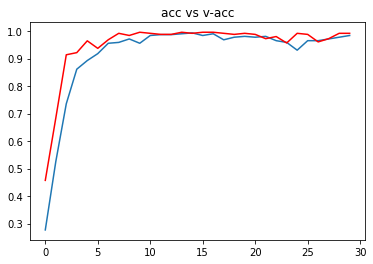

In [20]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c="red")
plt.title("acc vs v-acc")
plt.show()

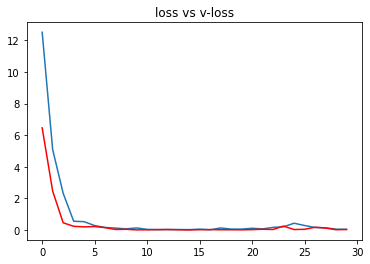

In [21]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c="red")
plt.title("loss vs v-loss")
plt.show()